In [52]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# A/B Testing Experiment - Introduction

Perusahaan pemasaran ingin melakukan kampanye yang sukses dalam pasar yang cukup kompleks. Untuk menjawab apakah kampanye akan sukses dan seberapa besar kesuksesan yang dapat dikaitkan dengan iklan akan dilakukan sebuah eksperimen (A/B Testing). A/B testing sebuah proses eksperimen acak dengan dua versi untuk menentukan versi dengan dampak maksimum. Pertanyaan yang ingin dijawab apakah kampanye akan sukses? seberapa besar kesuksesan yang dapat dikaitkan dengan iklan?

# Setting Up Problem

Dataset yang digunakan berasal dari kaggle [Dataset](https://www.kaggle.com/datasets/faviovaz/marketing-ab-testing?resource=download)

Data dictionary:

- Index: Row index
- user id: User ID (unique)
- test group: If "ad" the person saw the advertisement, if "psa" they only saw - the public service announcement
- converted: If a person bought the product then True, else is False
- total ads: Amount of ads seen by person
- most ads day: Day that the person saw the biggest amount of ads
- most ads hour: Hour of day that the person saw the biggest amount of ads

### Experiment Goal

> Untuk menentukan apakah kampanye pemasaran ini berhasil dan jika berhasil, seberapa efektif iklan dalam mendorong konversi atau penjualan barang.

### Metrics

> Metrik yang digunakan untuk A/B Testing ini adalah Conversion Rate.

### Variants

> Berdasarkan dataset ada dua variants:

> 1. Control → Samples yang melihat Public Services Ads (PSA)
2. Treatment → Samples yang melihat iklan

### Hypothesis

> H_0 : Nilai conversion rate iklan lebih rendah atau sama dengan nilai conversion rate pas.

> H_1 : Nilai conversion rate iklan lebih tinggi dari nilai conversion rate psa.

# Designing Experiments

- Randomization Unit : User ID
- Target of Randomization Unit : User
- Significant Level (alpha) : 5%
- Power Level :95 %
- Standard deviation of population: -
- Difference between control and treatment (1%) in Conversion Rate

### Menghitung sample size

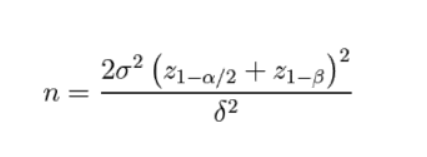

# Analyzing and Interpreting the Data

## Read Dataset

In [53]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import ttest_ind

In [54]:
df = pd.read_csv('/content/drive/MyDrive/Pacmann/marketing_AB.csv')
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


## Data Preprocessing & Data Cleaning

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     588101 non-null  int64 
 1   user id        588101 non-null  int64 
 2   test group     588101 non-null  object
 3   converted      588101 non-null  bool  
 4   total ads      588101 non-null  int64 
 5   most ads day   588101 non-null  object
 6   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(4), object(2)
memory usage: 27.5+ MB


In [56]:
df.describe()

,Unnamed: 0,user id,total ads,most ads hour
count,588101.000000,5.881010e+05,588101.000000,588101.000000
mean,294050.000000,1.310692e+06,24.820876,14.469061
std,169770.279668,2.022260e+05,43.715181,4.834634
min,0.000000,9.000000e+05,1.000000,0.000000
25%,147025.000000,1.143190e+06,4.000000,11.000000
50%,294050.000000,1.313725e+06,13.000000,14.000000
75%,441075.000000,1.484088e+06,27.000000,18.000000
max,588100.000000,1.654483e+06,2065.000000,23.000000


In [57]:
df.rename(columns=lambda x: x.strip().replace(" ", "_"), inplace=True)
df.head(1)

,Unnamed:_0,user_id,test_group,converted,total_ads,most_ads_day,most_ads_hour
0,0,1069124,ad,False,130,Monday,20


In [58]:
df.shape

(588101, 7)

In [59]:
# Mengecek missing value
df.isnull().sum()

Unnamed:_0       0
user_id          0
test_group       0
converted        0
total_ads        0
most_ads_day     0
most_ads_hour    0
dtype: int64

In [60]:
# Mengecek Duplikasi data
df[df["user_id"].duplicated()].count()

Unnamed:_0       0
user_id          0
test_group       0
converted        0
total_ads        0
most_ads_day     0
most_ads_hour    0
dtype: int64

In [61]:
# Label encoding (True=1 and False=0)
df["converted"] = np.where(df["converted"]==True, 1, 0)

In [62]:
# Menghapus kolom Unnamed:_0
df.drop('Unnamed:_0', axis=1, inplace=True)

In [63]:
df_clean = df.copy()

In [64]:
df_clean.head()

,user_id,test_group,converted,total_ads,most_ads_day,most_ads_hour
0,1069124,ad,0,130,Monday,20
1,1119715,ad,0,93,Tuesday,22
2,1144181,ad,0,21,Tuesday,18
3,1435133,ad,0,355,Tuesday,10
4,1015700,ad,0,276,Friday,14


## EDA

### Proporsi data pelanggan yang melihat iklan dan PSA

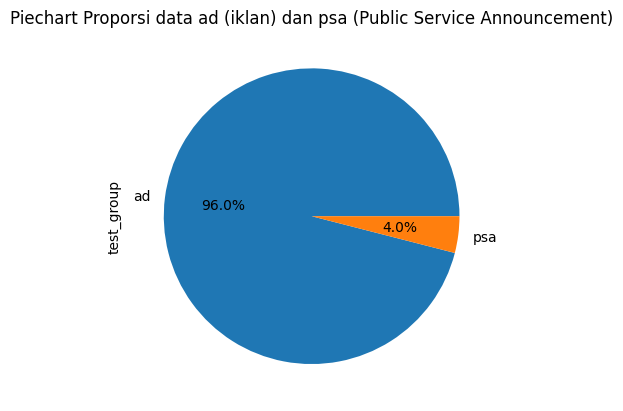

In [65]:
ax = df_clean["test_group"].value_counts().plot(kind="pie", autopct='%1.1f%%')
ax.set_title('Piechart Proporsi data ad (iklan) dan psa (Public Service Announcement)')
plt.show()

### Distribusi Data

In [66]:
def val_count(column):
    plt.figure(figsize=(7,5))
    sns.countplot(data=df_clean, x=column)
    plt.title(f'Value Count - {column}')
    plt.show()

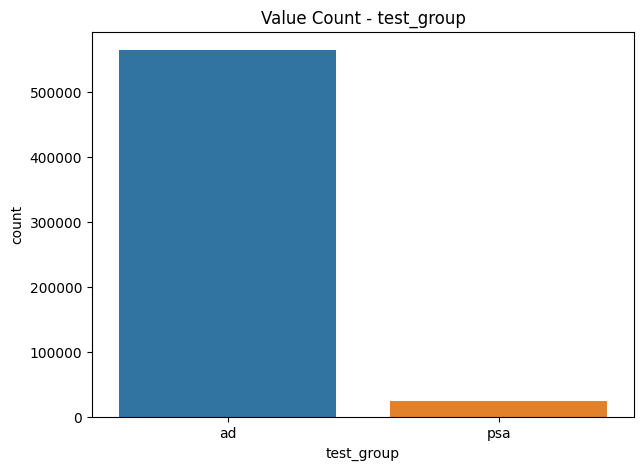

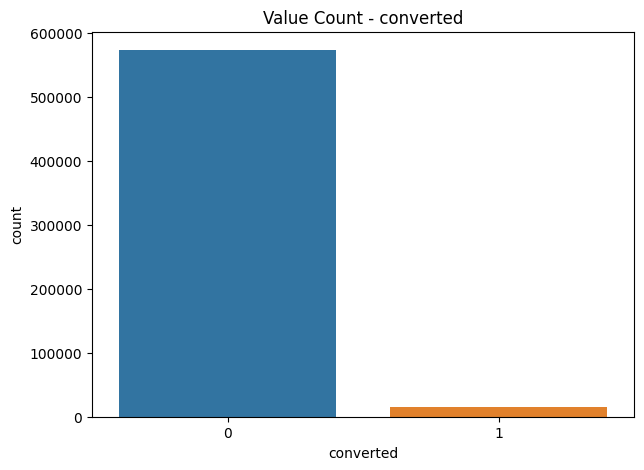

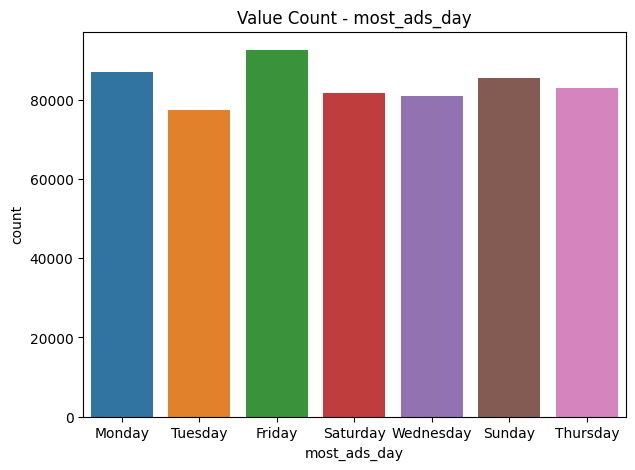

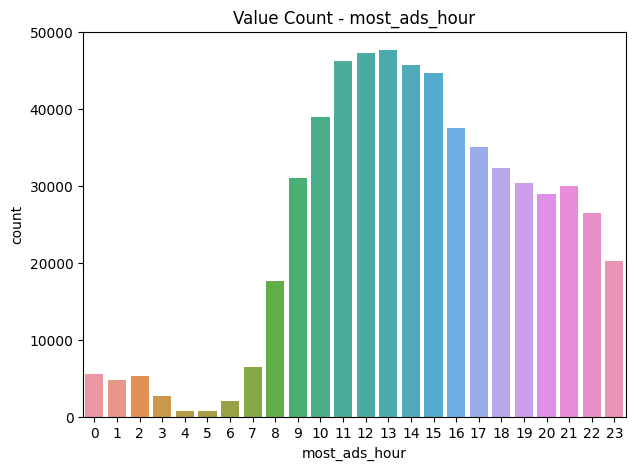

In [67]:
#create columns of interest
col_lst = df_clean.columns[[1,2,4,5]]

#loop through columns of interest
for i in col_lst:
    val_count(i)

informasi yang didapatkan:

- Pengguna lebih banyak melihat iklan dibandingkan dengan mereka yang melihat psa

- Iklan terbanyak yang dilihat oleh pengguna terjadi pada hari Jumat dan kemudian Senin

- Antara pukul 10.00 dan 15.00, pengguna melihat iklan paling banyak

### Conversion Rate

most_ads_day
Friday       2057
Monday       2857
Saturday     1719
Sunday       2090
Thursday     1790
Tuesday      2312
Wednesday    2018
Name: converted, dtype: int64


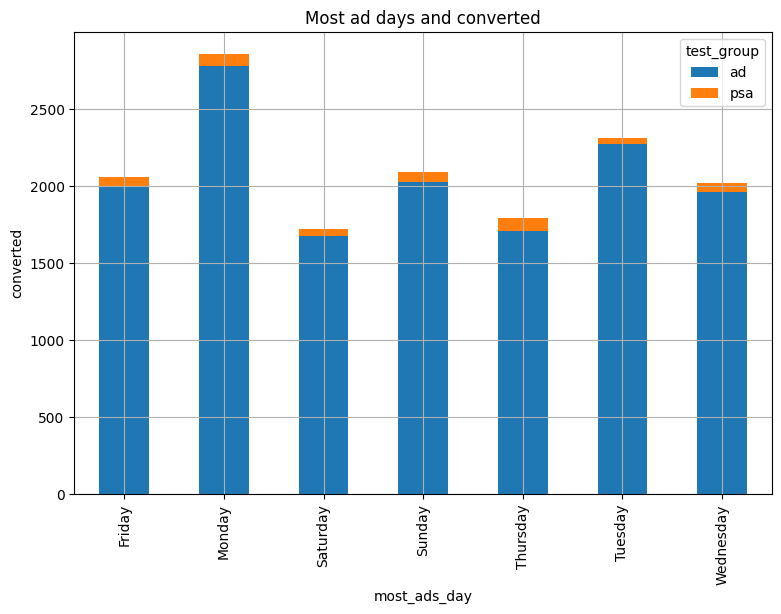

In [68]:
print(df_clean.groupby("most_ads_day")["converted"].sum())

ax =df_clean.groupby(by =['most_ads_day', 'test_group']).sum()['converted'].unstack('test_group').plot(kind='bar', figsize=(9,6), grid= True, stacked= True)
ax.set_ylabel('converted')
ax.set_title('Most ad days and converted')
plt.show()

Dari tingkat konversi tersebut dapat disimpulkan bahwa iklan memperoleh tingkat konversi yang lebih tinggi (2,5547%) dibandingkan dengan PSA (1,7854%). Hal ini menunjukkan bahwa iklan berhasil menghasilkan konversi dan kampanye iklan lebih efektif.

## Uji signifikansi

In [81]:
ad_dist = df[df["test_group"] == 'ad'].reset_index(drop=True)
psa_dist = df[df["test_group"] == 'psa'].reset_index(drop=True)

In [75]:
# test signifikansi
ttest_ind(psa_dist.converted, ad_dist.converted)

Ttest_indResult(statistic=-7.37040597428566, pvalue=1.7033052627831264e-13)

In [84]:
# Hitung Jumlah Sampel per Grup
df_control = df[df['test_group']=='psa']
df_treatment = df[df['test_group']=='ad']

n_control = df_control.shape[0]
n_treatment = df_treatment.shape[0]

n_control, n_treatment

(23524, 564577)

In [86]:
# convident interval

from statsmodels.stats.proportion import confint_proportions_2indep

confidence_interval = confint_proportions_2indep(count1 = n_treatment, nobs1 = n_treatment,
                                                 count2 = n_control, nobs2 = n_control,
                                                 compare='diff', alpha=0.05)
print(confidence_interval)

(-6.804089934919766e-06, 0.00016327289638606857)


In [77]:
# conversion rates
converts_psa = psa_dist.groupby('converted')['user_id'].count()
converts_ad = ad_dist.groupby('converted')['user_id'].count()
(100 * converts_psa[1]/converts_psa[0]), (100 * converts_ad[1]/converts_ad[0])

(1.8178670360110802, 2.6216295800812137)

# Conclusion and Recommendation

### Kesimpulan

> Kampanye iklan berhasil mencapai tingkat konversi yang lebih tinggi sebesar 2,62% dibandingkan dengan kelompok PSA sebesar 1,81%. Hal ini menunjukkan bahwa kampanye iklan lebih efektif dalam mendorong konversi dibandingkan dengan PSA.

> Nilai p uji t-test sebesar 0,0000 (Tolak H0) menunjukkan bahwa perbedaan tingkat konversi antara kedua kelompok tersebut signifikan secara statistik. Ini memberikan bukti kuat untuk perbedaan yang diamati antara kedua kelompok tersebut.

> Secara keseluruhan, hasil ini menunjukkan bahwa kampanye iklan berhasil dalam mendorong konversi.

### Rekomendasi

> Berdasarkan hasil tersebut, dapat merekomendasikan untuk terus mengalokasikan sumber daya dan anggaran lebih kepada kelompok iklan daripada PSA. Tingkat konversi yang lebih tinggi dan signifikansi statistik menunjukkan bahwa iklan memiliki dampak positif yang jelas dalam mendorong konversi. Oleh karena itu, fokus pada strategi iklan yang telah terbukti efektif dan terus mengoptimalkannya dapat membantu mencapai tujuan kampanye dengan lebih efisien.